TRAFIC FORECAST USING TIME SERIES ANALYSIS

The dataset contains information about the date, time and an attribute count which denotes the number of vehicles passing through a given area at that particular time. The objective behind this project is to predict the trend in traffic in that particular area at any given time or date based on the 'count' of previous years.We also try to use various different functions and other algorithms to predict the trend in the dataset.

IMPORTING NECESSARY PACKAGES

In [40]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

LOADING DATASET

In [41]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [42]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [43]:
np.shape(df)

(18288, 3)

PREPROCESSING

In [44]:
df.dropna(how='any')

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [46]:
np.max(df['Count'])

1244

In [47]:
np.min(df['Count'])

2

In [48]:
x=df['Count']
x.values

array([  8,   2,   6, ..., 702, 580, 534])

In [49]:
x.dtype

dtype('int64')

In [50]:
x.shape

(18288,)

In [51]:
m=x.mean()

In [52]:
high=np.empty(x.shape)
c=0
for i in x:
  if i>m:
    high[c]=1
  else:
    high[c]=0
  c=c+1
high

array([0., 0., 0., ..., 1., 1., 1.])

In [62]:
h=pd.Series(high,name="Traffic")
h

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18283    1.0
18284    1.0
18285    1.0
18286    1.0
18287    1.0
Name: Traffic, Length: 18288, dtype: float64

In [67]:
data=pd.merge(df,h,left_on="ID",right_index=True)

In [68]:
data

,ID,Datetime,Count,Traffic
0,0,25-08-2012 00:00,8,0.0
1,1,25-08-2012 01:00,2,0.0
2,2,25-08-2012 02:00,6,0.0
3,3,25-08-2012 03:00,2,0.0
4,4,25-08-2012 04:00,2,0.0
...,...,...,...,...
18283,18283,25-09-2014 19:00,868,1.0
18284,18284,25-09-2014 20:00,732,1.0
18285,18285,25-09-2014 21:00,702,1.0
18286,18286,25-09-2014 22:00,580,1.0


In [69]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [70]:
data.index=data['Datetime']
data['y'] = data['Count']
data.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
data = data.resample('D').sum()
data.head()

,Traffic,y
Datetime,,
2012-08-25,0.0,76
2012-08-26,0.0,88
2012-08-27,0.0,62
2012-08-28,0.0,58
2012-08-29,0.0,60


In [71]:
train, test=data[data["Traffic"]==1], data[data["Traffic"]==1]

In [72]:
len(train)

18

In [73]:
len(test)

18

In [81]:
features=data.columns[:2]

In [82]:
y=pd.factorize(train['Traffic'])[0]

In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
clf=RandomForestClassifier(n_jobs=2,random_state=0)

In [85]:
clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
data['ds'] = data.index
data.head()

,Traffic,y,ds
Datetime,,,
2012-08-25,0.0,76,2012-08-25
2012-08-26,0.0,88,2012-08-26
2012-08-27,0.0,62,2012-08-27
2012-08-28,0.0,58,2012-08-28
2012-08-29,0.0,60,2012-08-29


VISUALIZING TREND BETWEEN DT AND VC

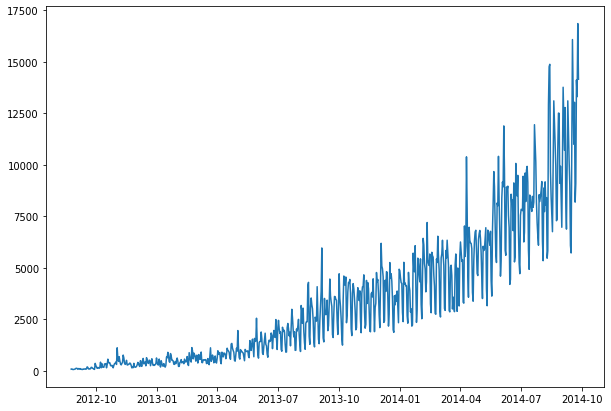

In [90]:
plt.figure(figsize=(10,7))
plt.plot(data['ds'], data['y'])
plt.show()

In [91]:
size = 100
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=size/len(data), shuffle=False)
train.head()

,Traffic,y,ds
Datetime,,,
2012-08-25,0.0,76,2012-08-25
2012-08-26,0.0,88,2012-08-26
2012-08-27,0.0,62,2012-08-27
2012-08-28,0.0,58,2012-08-28
2012-08-29,0.0,60,2012-08-29


In [92]:
test.head()

,Traffic,y,ds
Datetime,,,
2014-06-18,24.0,8300,2014-06-18
2014-06-19,23.0,6802,2014-06-19
2014-06-20,24.0,9118,2014-06-20
2014-06-21,21.0,5282,2014-06-21
2014-06-22,19.0,5540,2014-06-22


In [93]:
test.tail()

,Traffic,y,ds
Datetime,,,
2014-09-21,22.0,9102,2014-09-21
2014-09-22,24.0,14116,2014-09-22
2014-09-23,24.0,13304,2014-09-23
2014-09-24,24.0,16856,2014-09-24
2014-09-25,24.0,14152,2014-09-25


In [94]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
f_data = model.make_future_dataframe(periods=100)
f_data

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [96]:
forecast = model.predict(f_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-509.515681,-1709.371101,115.694725,-509.515681,-509.515681,-272.470704,-272.470704,-272.470704,-786.127881,-786.127881,-786.127881,513.657176,513.657176,513.657176,0.0,0.0,0.0,-781.986385
1,2012-08-26,-502.314109,-1766.648799,-0.593778,-502.314109,-502.314109,-388.737957,-388.737957,-388.737957,-902.932915,-902.932915,-902.932915,514.194958,514.194958,514.194958,0.0,0.0,0.0,-891.052066
2,2012-08-27,-495.112537,-503.177356,1305.415318,-495.112537,-495.112537,885.905234,885.905234,885.905234,372.157378,372.157378,372.157378,513.747856,513.747856,513.747856,0.0,0.0,0.0,390.792697
3,2012-08-28,-487.910965,-496.734949,1316.156166,-487.910965,-487.910965,930.865597,930.865597,930.865597,418.330932,418.330932,418.330932,512.534665,512.534665,512.534665,0.0,0.0,0.0,442.954632
4,2012-08-29,-480.709393,-442.922153,1316.799765,-480.709393,-480.709393,882.438286,882.438286,882.438286,371.679601,371.679601,371.679601,510.758685,510.758685,510.758685,0.0,0.0,0.0,401.728894


100

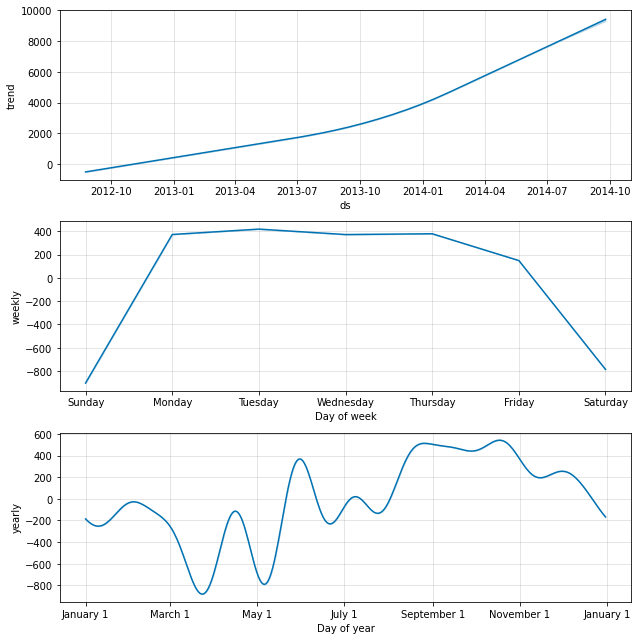

In [97]:
model.plot_components(forecast)
pred = forecast.iloc[-100:, :]
len(pred)

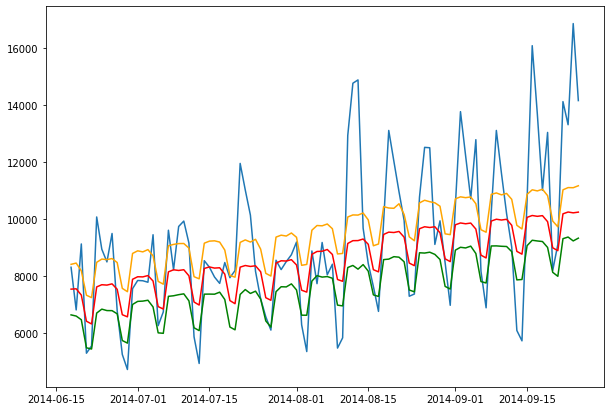

In [98]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

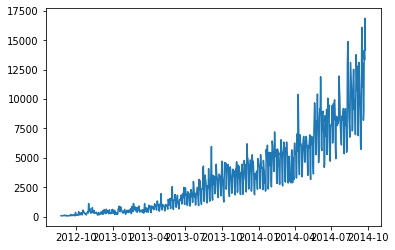

In [100]:
plt.plot(data['ds'], data['y'])
plt.show()

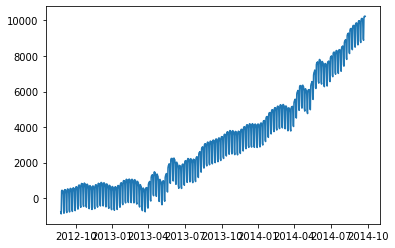

In [101]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [102]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-691.413088,-2282.023638,150.189929,-691.413088,-691.413088,-423.432144,-423.432144,-423.432144,-995.120367,-995.120367,-995.120367,571.688223,571.688223,571.688223,0.0,0.0,0.0,-1114.845232
1,2012-08-26,-683.288701,-2463.892197,-17.291816,-683.288701,-683.288701,-581.426591,-581.426591,-581.426591,-1144.187184,-1144.187184,-1144.187184,562.760593,562.760593,562.760593,0.0,0.0,0.0,-1264.715292
2,2012-08-27,-675.164314,-739.441875,1522.664890,-675.164314,-675.164314,1008.545650,1008.545650,1008.545650,457.575538,457.575538,457.575538,550.970112,550.970112,550.970112,0.0,0.0,0.0,333.381336
3,2012-08-28,-667.039926,-672.255811,1662.294760,-667.039926,-667.039926,1145.477035,1145.477035,1145.477035,608.350482,608.350482,608.350482,537.126553,537.126553,537.126553,0.0,0.0,0.0,478.437108
4,2012-08-29,-658.915539,-751.606988,1639.358962,-658.915539,-658.915539,1078.945696,1078.945696,1078.945696,556.887062,556.887062,556.887062,522.058634,522.058634,522.058634,0.0,0.0,0.0,420.030157


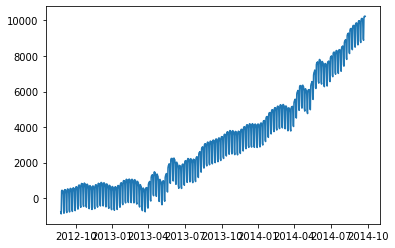

In [103]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()